<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/CC7221/tarea1/results_visualizationsipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !unzip './drive/My Drive/dataCC7221/Sketch_EITZ.zip'

In [0]:
import matplotlib as mp
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [0]:

def read_data_from_file(str_path, dataset = 'train', shuffle = True):
    """
    Funcion que lee las direcciones de las imagenes y entrega los labels y 
    las direcciones como string, tambien
    las revuelve para aleatoriedad.

    Input:
        string_path:    camino a archivos de dataset
        dataset:        especifica train o test
        shuffle:        booleano que especifica si se revuelve el dataset o no
    Output:
        filenames:      caminos en strings a las imagenes en forma de lista
        labels:         labels en forma de strings
    """

    datafile = os.path.join(str_path, dataset + '.txt')
    assert os.path.exists(datafile)

    with open(datafile) as file :
        lines = [line.strip() for line in file]
        if shuffle:
            random.shuffle(lines)
        _lines = [tuple(line.rstrip().split('\t')) for line in lines]
        filenames, labels = zip(*_lines)
        labels = validate_labels(labels)
        filenames = [os.path.join(str_path, line) for line in filenames]

    return filenames, labels

def validate_labels(labels):
    """
    Funcion que valida los labels, deben ser desde 0 a clases-1
    Input:
        labels:     arreglo de string con los labels
    Output:
        labels:     arreglo de enteros con los labels
    """
    new_labels = [int(label) for label in labels]
    label_set = set(new_labels)
    if (len(label_set) == max(label_set) + 1) and (min(label_set) == 0):
        return new_labels
    else:
        raise ValueError("Algunos labels faltan o estan incorrectos en {}".format(label_set))

In [0]:
X_train = []
Z = []
img_size = 256
n_channels = 1
nb_classes = 250

In [0]:
keras.backend.clear_session()

# se debe crear el dataset
data_dir = './Sketch_EITZ'

real_labels = []
mapping = './Sketch_EITZ/mapping.txt'
with open(mapping) as file:
    for ln in file:
        arg, label = ln.strip().split('\t')
        real_labels.append(arg)
real_labels = np.array(real_labels)

test_images, test_labels = read_data_from_file(data_dir, 'test')



In [0]:
def get_numpy_array(images):
    X = []
    for img in tqdm(images):
        img = plt.imread(img)
        X.append(np.reshape(img, (img_size, img_size, n_channels)))

    X = np.array(X)
    return X

In [6]:
X_test = []
X_test = get_numpy_array(test_images)


100%|██████████| 4000/4000 [00:03<00:00, 1172.37it/s]


In [7]:
y_test = np.array(test_labels)
print(y_test.shape)


(4000,)


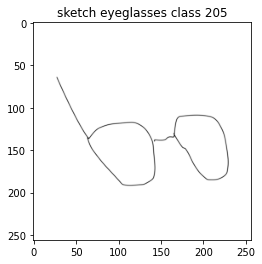

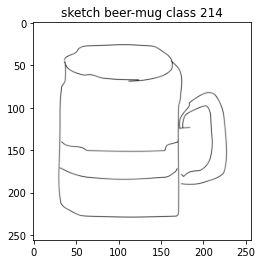

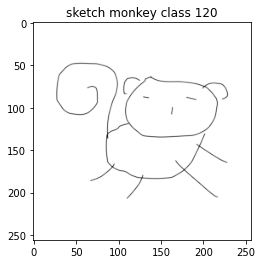

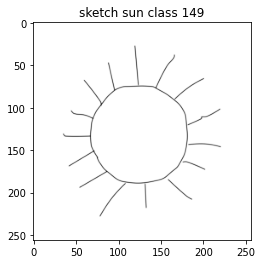

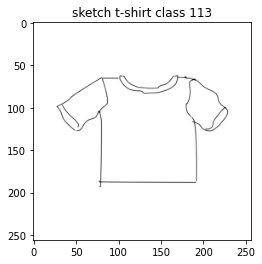

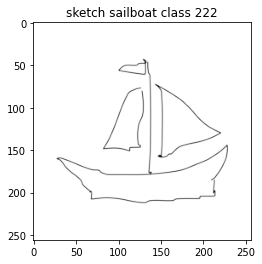

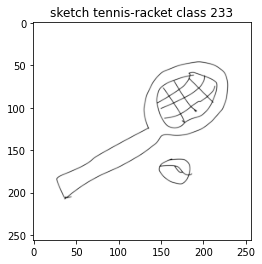

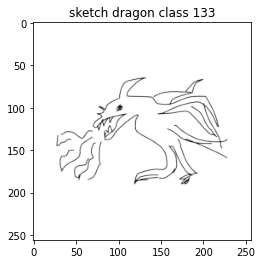

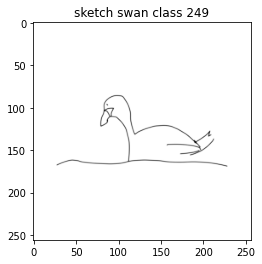

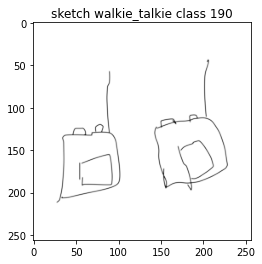

In [8]:
for n in range(10):
  n = np.random.randint(0, len(y_test), size=1)[0]
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('sketch {} class {}'.format(real_labels[y_test[n]], y_test[n]))
  plt.show()


In [0]:
history_squeeze     = np.load('./drive/My Drive/dataCC7221/trainHistoryDict_squeeze',         allow_pickle=True)
history_resnet_drop = np.load('./drive/My Drive/dataCC7221/trainHistoryDict_resnet_def_drop', allow_pickle=True)
history_resnet      = np.load('./drive/My Drive/dataCC7221/trainHistoryDict_resnet_def',      allow_pickle=True)
history_vgg         = np.load('./drive/My Drive/dataCC7221/trainHistoryDict_vgg_def',         allow_pickle=True)

------squeeze------
------resnet + drop------
------resnet------
------VGG------


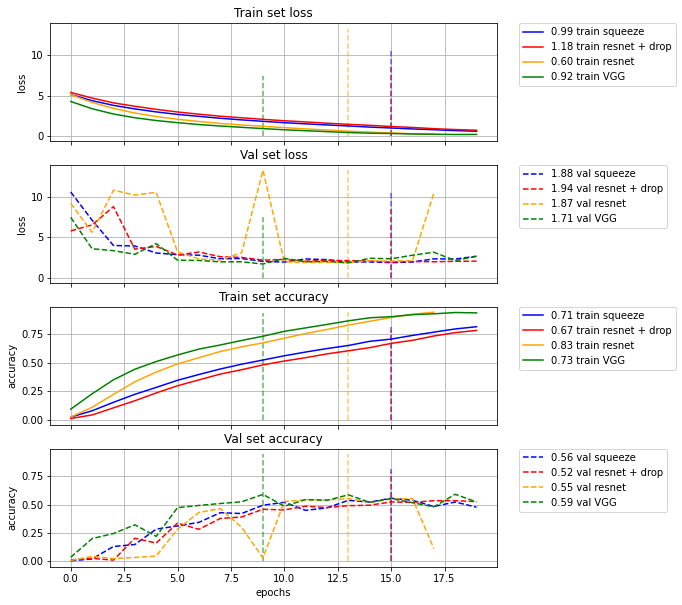

In [10]:
fig, axs = plt.subplots(4, sharex=True, figsize=(8,10))
# fig.suptitle('Training')

axs[0].set_ylabel('loss')
axs[1].set_ylabel('loss')
axs[2].set_ylabel('accuracy')
axs[3].set_ylabel('accuracy')
axs[3].set_xlabel('epochs')

axs[0].set_title('Train set loss')
axs[1].set_title('Val set loss')
axs[2].set_title('Train set accuracy')
axs[3].set_title('Val set accuracy')

axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()

for history, name, color in [(history_squeeze, 'squeeze', 'blue'),
                            (history_resnet_drop, 'resnet + drop', 'red'),
                            (history_resnet, 'resnet', 'orange'),
                            (history_vgg, 'VGG', 'green')]:

  print('------{}------'.format(name))

  a = np.where(np.min(history['val_loss']) == history['val_loss'])[0][0]

  axs[0].plot(history['loss'],
              label='{1:.2f} train {0}'.format(name, history['loss'][a]),
              color=color)
  axs[1].plot(history['val_loss'],
              label='{1:.2f} val {0}'.format(name, history['val_loss'][a]),
              ls='dashed', color=color)

  
  axs[0].vlines(a, ymin=0, ymax=max(history['val_loss']), color=color,
            alpha=0.6, linestyles='dashed')
  axs[1].vlines(a, ymin=0, ymax=max(history['val_loss']), color=color,
            alpha=0.6, linestyles='dashed')
  
  axs[2].plot(history['accuracy'],
              label='{1:.2f} train {0}'.format(name, history['accuracy'][a]),
              color=color)
  
  axs[3].plot(history['val_accuracy'],
              label='{1:.2f} val {0}'.format(name, history['val_accuracy'][a]),
              ls='dashed', color=color)

  
  axs[2].vlines(a, ymin=0, ymax=max(history['accuracy']), color=color,
            alpha=0.6, linestyles='dashed')
  axs[3].vlines(a, ymin=0, ymax=max(history['accuracy']), color=color,
            alpha=0.6, linestyles='dashed')

axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axs[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Evaluación del mejor modelo

Se evalúa el desempeño del modelo sobre todas las clases para determinar la clase más difícil y las que más se parecen a ellas.

In [11]:
import sklearn.metrics as met

best_model = keras.models.load_model('./drive/My Drive/dataCC7221/model1squeeze/model.16-1.88.h5')
loss, acc = best_model.evaluate(X_test, y_test, batch_size=32, )


125/125 [==============================] - 13s 104ms/step - loss: 1.8843 - accuracy: 0.5567


In [12]:
# obtener metricas por clase
y_pred = best_model.predict(X_test, verbose=1)

125/125 [==============================] - 13s 103ms/step


In [13]:
y_pred_ = np.argmax(layers.Softmax()(y_pred), axis=1)
y_pred_squeeze = np.argmax(layers.Softmax()(y_pred), axis=1)
print(y_pred_)
y_pred_scores = [l[y_pred_[i]].numpy() for i, l in enumerate(layers.Softmax()(y_pred))]
y_pred_scores_squeeze = [l[y_pred_[i]].numpy() for i, l in enumerate(layers.Softmax()(y_pred))]
print(y_pred_scores[:2])

[177 190 113 ...  24 198 204]
[0.8034911, 0.9668948]


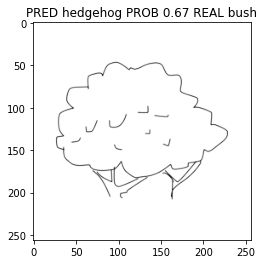

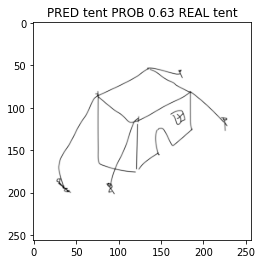

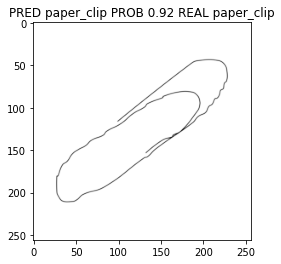

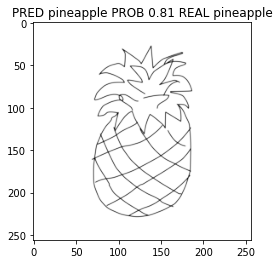

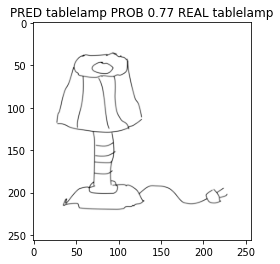

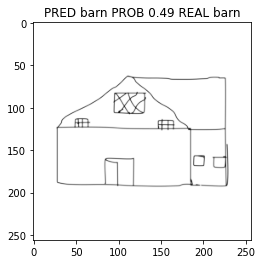

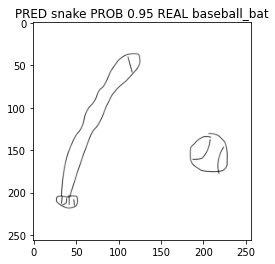

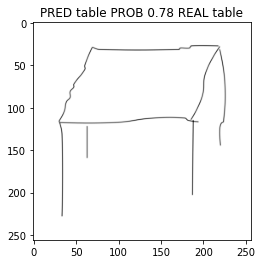

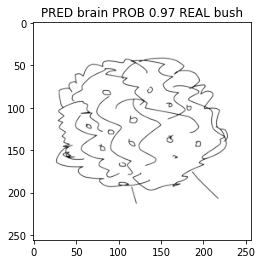

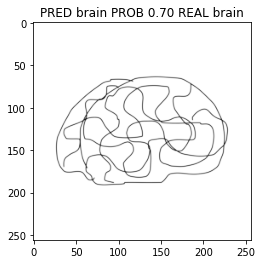

In [14]:
NN = np.random.randint(0, len(y_test), size=10)

for n in NN:
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [15]:
cohen_kappa = met.cohen_kappa_score(y_test,y_pred_)
balanced_acc = met.balanced_accuracy_score(y_test, y_pred_)

template = '{:.3f}\t cohen kappa\n{:.3f}\t balanced_accuracy\n'
template += ''
print(template.format(cohen_kappa, balanced_acc))

print(met.classification_report(y_test, y_pred_, target_names=real_labels))

0.555	 cohen kappa
0.561	 balanced_accuracy

                  precision    recall  f1-score   support

            head       1.00      0.36      0.53        14
  human-skeleton       0.73      0.67      0.70        12
           chair       0.57      0.80      0.67        10
         pretzel       0.82      0.75      0.78        12
          shovel       0.73      0.36      0.48        22
            leaf       0.21      0.69      0.32        13
       parachute       0.83      0.53      0.65        19
           house       1.00      0.11      0.20        18
       hamburger       0.77      0.67      0.71        15
      chandelier       0.89      0.38      0.53        21
            tire       0.67      0.38      0.48        21
           truck       0.59      0.59      0.59        17
      frying-pan       0.59      0.91      0.71        11
            lion       0.00      0.00      0.00        13
            vase       0.81      0.81      0.81        16
       saxophone       0.4

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if mas_parecido_count / real > 0.3:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

  7 real  18 pred   2 class 	house
				barn	0.50
-------------
 10 real  21 pred  12 class 	tire
				wheel	0.38
-------------
 19 real  15 pred   5 class 	hammer
				axe	0.40
-------------
 25 real  21 pred  16 class 	seagull
				standing_bird	0.67
-------------
 27 real  22 pred   5 class 	pigeon
				standing_bird	0.41
-------------
 69 real  15 pred  18 class 	cabinet
				bookshelf	0.40
-------------
 78 real  13 pred   8 class 	tv
				computer_monitor	0.31
-------------
 79 real   9 pred  51 class 	standing_bird
				flying_bird	0.33
-------------
 81 real  16 pred   3 class 	scorpion
				lobster	0.50
-------------
106 real   9 pred  13 class 	armchair
				chair	0.33
-------------
118 real  19 pred  13 class 	shark
				flying_bird	0.32
-------------
126 real  13 pred   2 class 	foot
				arm	0.46
-------------
128 real  17 pred   5 class 	snowboard
				wrist-watch	0.35
-------------
142 real  19 pred   7 class 	duck
				standing_bird	0.47
-------------
187 real  16 pred   4 class 	spo

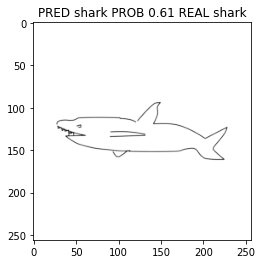

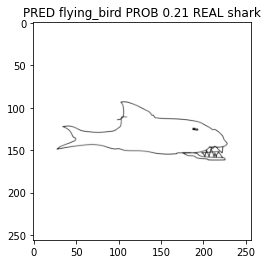

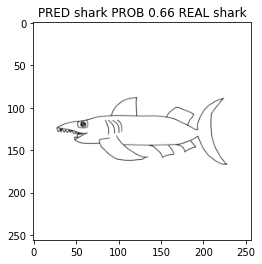

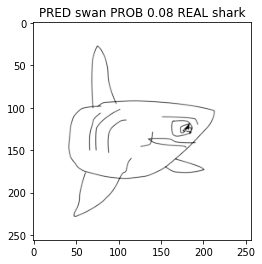

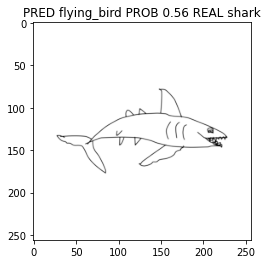

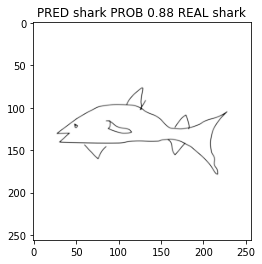

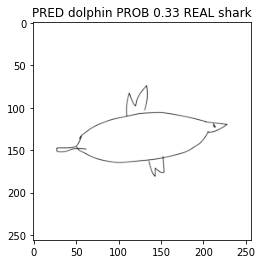

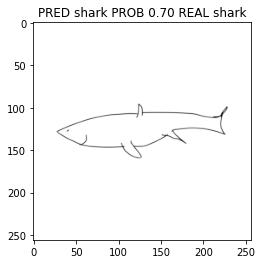

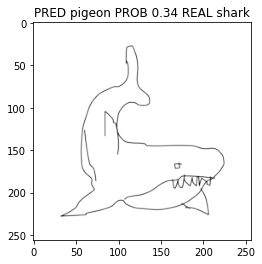

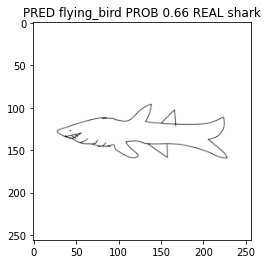

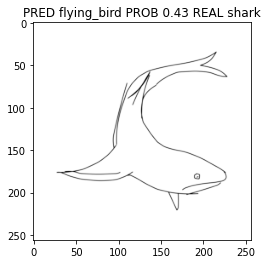

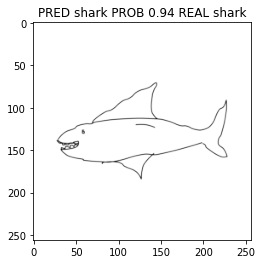

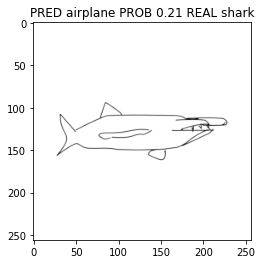

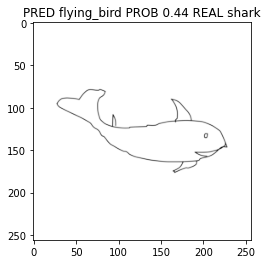

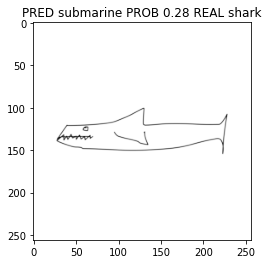

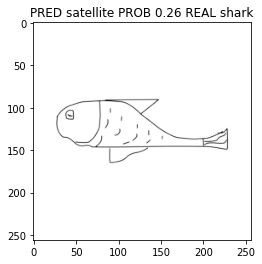

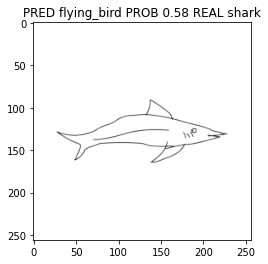

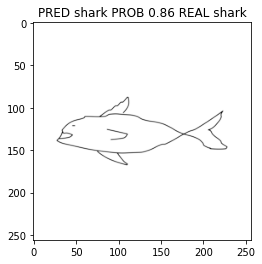

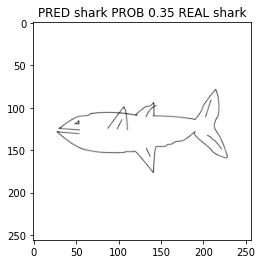

In [17]:
for n in np.where(y_test == np.where(real_labels == 'shark')[0])[0]:
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [18]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if real / predichas < 0.5:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

  5 real  13 pred  43 class 	leaf
				wheel	0.08
-------------
 55 real  13 pred  30 class 	wheel
				donut	0.15
-------------
 58 real  16 pred  55 class 	lobster
				satellite	0.12
-------------
 73 real  23 pred  58 class 	satellite
				satellite_dish	0.09
-------------
 79 real   9 pred  51 class 	standing_bird
				flying_bird	0.33
-------------
122 real  19 pred  41 class 	diamond
				sailboat	0.11
-------------
125 real  12 pred  32 class 	boomerang
				moon	0.17
-------------
133 real  17 pred  40 class 	dragon
				flying_bird	0.18
-------------
167 real  21 pred  57 class 	snake
				shovel	0.05
-------------
169 real  15 pred  75 class 	flying_bird
				snake	0.13
-------------
175 real  11 pred  38 class 	bookshelf
				skyscraper	0.09
-------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in long_scalars


## Resnet con drop


In [19]:
best_model_resnet = keras.models.load_model('./drive/My Drive/dataCC7221/model1resnet_def_drop/model.16-1.94.h5')
loss, acc = best_model_resnet.evaluate(X_test, y_test, batch_size=32, )

125/125 [==============================] - 11s 89ms/step - loss: 1.9425 - accuracy: 0.5240


In [20]:
# obtener metricas por clase
y_pred = best_model_resnet.predict(X_test, verbose=1)

125/125 [==============================] - 11s 88ms/step


In [21]:
y_pred_ = np.argmax(layers.Softmax()(y_pred), axis=1)
y_pred_res_drop = np.argmax(layers.Softmax()(y_pred), axis=1)
print(y_pred_)
y_pred_scores_res_drop = [l[y_pred_[i]].numpy() for i, l in enumerate(layers.Softmax()(y_pred))]
print(y_pred_scores[:2])

[ 85 190 113 ...  24 198  28]
[0.8034911, 0.9668948]


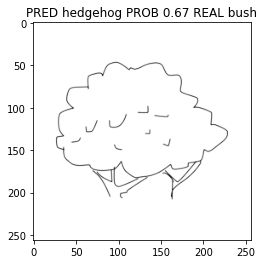

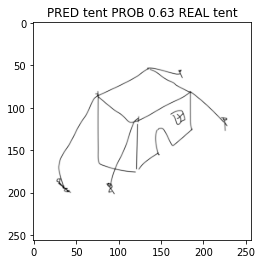

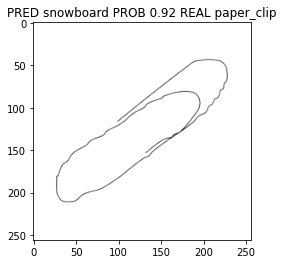

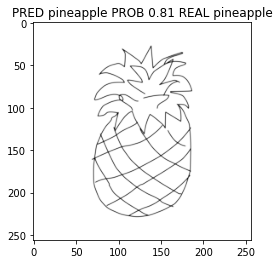

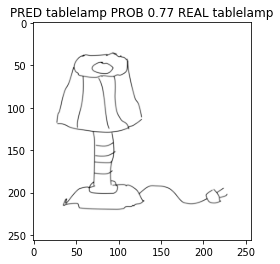

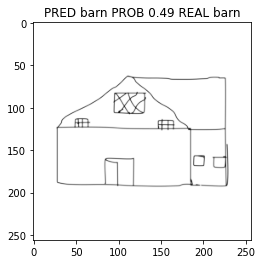

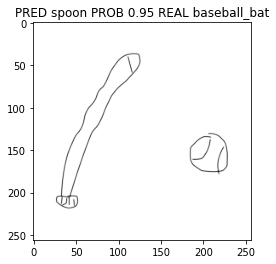

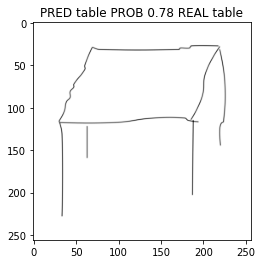

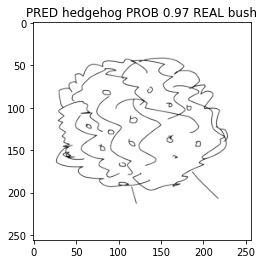

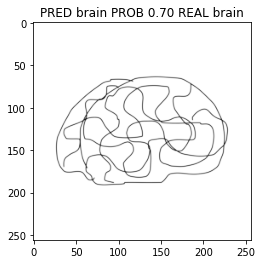

In [22]:
for n in NN:
  # printear real
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [23]:
cohen_kappa = met.cohen_kappa_score(y_test,y_pred_)
balanced_acc = met.balanced_accuracy_score(y_test, y_pred_)

template = '{:.3f}\t cohen kappa\n{:.3f}\t balanced_accuracy\n'
template += ''
print(template.format(cohen_kappa, balanced_acc))

print(met.classification_report(y_test, y_pred_, target_names=real_labels))

0.522	 cohen kappa
0.524	 balanced_accuracy

                  precision    recall  f1-score   support

            head       0.40      0.71      0.51        14
  human-skeleton       1.00      0.42      0.59        12
           chair       0.80      0.80      0.80        10
         pretzel       0.89      0.67      0.76        12
          shovel       0.68      0.68      0.68        22
            leaf       0.32      0.46      0.37        13
       parachute       0.85      0.58      0.69        19
           house       1.00      0.06      0.11        18
       hamburger       0.60      0.80      0.69        15
      chandelier       0.73      0.38      0.50        21
            tire       0.46      0.52      0.49        21
           truck       0.50      0.18      0.26        17
      frying-pan       0.56      0.91      0.69        11
            lion       0.00      0.00      0.00        13
            vase       0.41      0.81      0.54        16
       saxophone       1.0

In [24]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if mas_parecido_count / real > 0.3:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

  5 real  13 pred  19 class 	leaf
				feather	0.31
-------------
 25 real  21 pred   9 class 	seagull
				pigeon	0.38
-------------
 30 real  12 pred   6 class 	bulldozer
				ship	0.50
-------------
 43 real  14 pred   8 class 	screwdriver
				knife	0.36
-------------
 46 real  18 pred  25 class 	cake
				ship	0.33
-------------
 55 real  13 pred  10 class 	wheel
				tire	0.38
-------------
 57 real  15 pred  26 class 	cup
				mug	0.40
-------------
 65 real  10 pred   2 class 	teddy-bear
				panda	0.50
-------------
 82 real  15 pred   7 class 	fish
				shark	0.40
-------------
 92 real  14 pred  14 class 	table
				bench	0.43
-------------
 99 real  14 pred  17 class 	spider
				mosquito	0.43
-------------
111 real  20 pred   9 class 	baseball_bat
				pen	0.55
-------------
117 real  12 pred   4 class 	car_sedan
				race_car	0.50
-------------
132 real  19 pred  12 class 	teacup
				cup	0.42
-------------
146 real  11 pred   7 class 	face
				head	0.36
-------------
162 real  12 pred

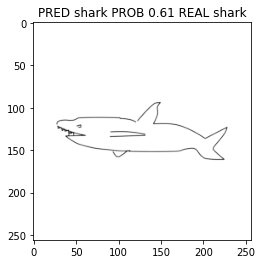

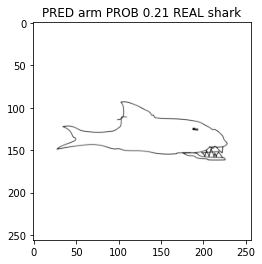

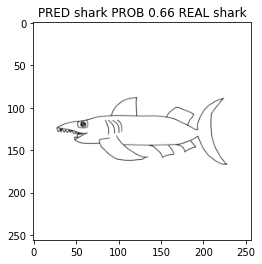

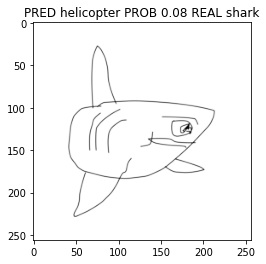

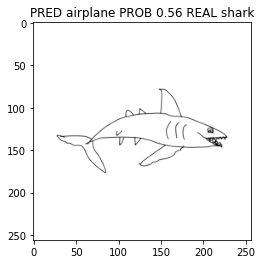

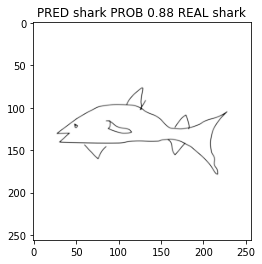

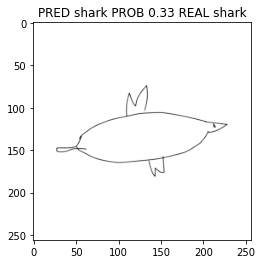

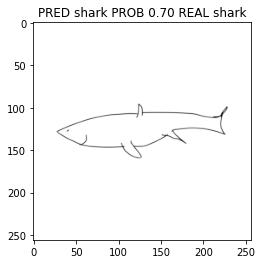

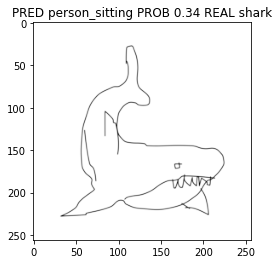

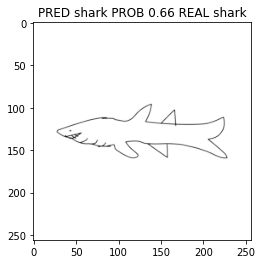

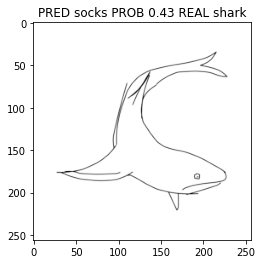

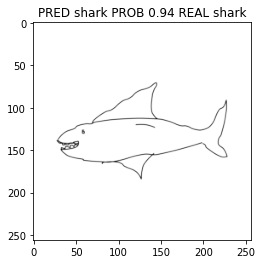

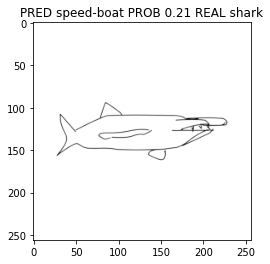

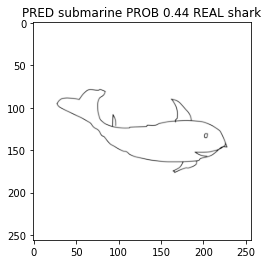

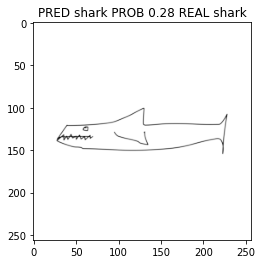

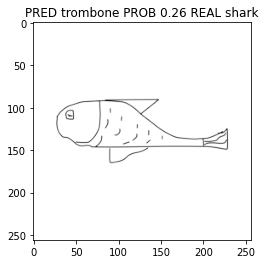

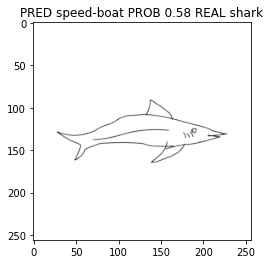

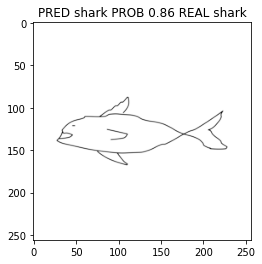

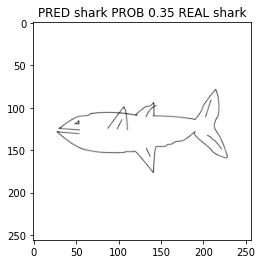

In [25]:
for n in np.where(y_test == np.where(real_labels == 'shark')[0])[0]:
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [26]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if real / predichas < 0.5:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

 16 real  17 pred  40 class 	pen
				cigarette	0.12
-------------
 19 real  15 pred  35 class 	hammer
				sword	0.07
-------------
 41 real  13 pred  49 class 	flower_with_stem
				frog	0.08
-------------
 87 real  10 pred  26 class 	space_shuttle
				shark	0.10
-------------
108 real  17 pred  57 class 	ship
				speed-boat	0.18
-------------
125 real  12 pred  29 class 	boomerang
				telephone	0.00
-------------
143 real  12 pred  25 class 	sword
				pen	0.17
-------------
144 real  12 pred  30 class 	cow
				cat	0.08
-------------
151 real  18 pred  39 class 	syringe
				hammer	0.06
-------------
160 real  15 pred  34 class 	airplane
				submarine	0.07
-------------
176 real  17 pred  37 class 	crab
				frog	0.12
-------------
184 real  15 pred  35 class 	bowl
				tomato	0.07
-------------
209 real  13 pred  35 class 	arm
				cigarette	0.08
-------------
210 real  16 pred  48 class 	mermaid
				leaf	0.06
-------------
224 real   9 pred  30 class 	blimp
				bathtub	0.11
-------------


## Resnet

In [27]:
best_model_resnet = keras.models.load_model('./drive/My Drive/dataCC7221/model1resnet_def/model.14-1.87.h5')
loss, acc = best_model_resnet.evaluate(X_test, y_test, batch_size=32, )

125/125 [==============================] - 11s 89ms/step - loss: 1.8733 - accuracy: 0.5535


In [28]:
# obtener metricas por clase
y_pred = best_model_resnet.predict(X_test, verbose=1)

125/125 [==============================] - 11s 88ms/step


In [29]:
y_pred_res = np.argmax(layers.Softmax()(y_pred), axis=1)
print(y_pred_)
y_pred_scores_res = [l[y_pred_[i]].numpy() for i, l in enumerate(layers.Softmax()(y_pred))]
print(y_pred_scores[:2])

[ 85 190 113 ...  24 198  28]
[0.8034911, 0.9668948]


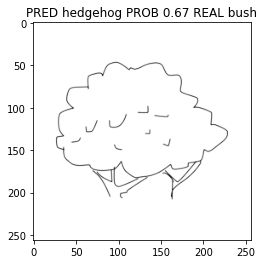

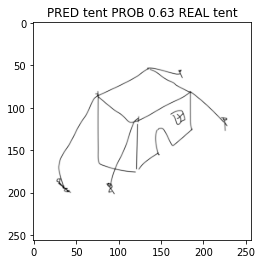

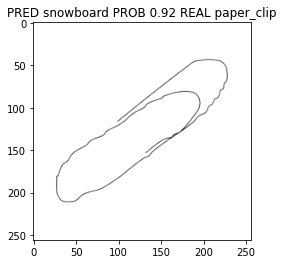

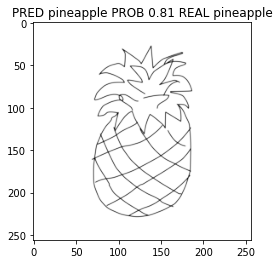

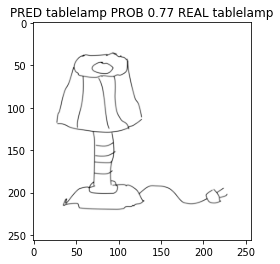

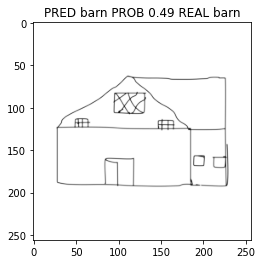

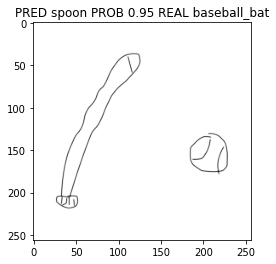

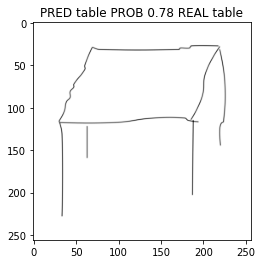

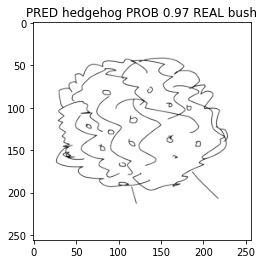

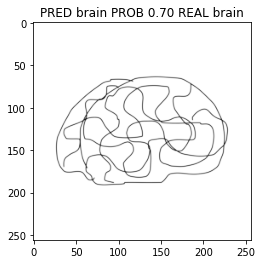

In [30]:
for n in NN:
  # printear real
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [31]:
cohen_kappa = met.cohen_kappa_score(y_test,y_pred_)
balanced_acc = met.balanced_accuracy_score(y_test, y_pred_)

template = '{:.3f}\t cohen kappa\n{:.3f}\t balanced_accuracy\n'
template += ''
print(template.format(cohen_kappa, balanced_acc))

print(met.classification_report(y_test, y_pred_, target_names=real_labels))

0.522	 cohen kappa
0.524	 balanced_accuracy

                  precision    recall  f1-score   support

            head       0.40      0.71      0.51        14
  human-skeleton       1.00      0.42      0.59        12
           chair       0.80      0.80      0.80        10
         pretzel       0.89      0.67      0.76        12
          shovel       0.68      0.68      0.68        22
            leaf       0.32      0.46      0.37        13
       parachute       0.85      0.58      0.69        19
           house       1.00      0.06      0.11        18
       hamburger       0.60      0.80      0.69        15
      chandelier       0.73      0.38      0.50        21
            tire       0.46      0.52      0.49        21
           truck       0.50      0.18      0.26        17
      frying-pan       0.56      0.91      0.69        11
            lion       0.00      0.00      0.00        13
            vase       0.41      0.81      0.54        16
       saxophone       1.0

In [32]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if mas_parecido_count / real > 0.3:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

  5 real  13 pred  19 class 	leaf
				feather	0.31
-------------
 25 real  21 pred   9 class 	seagull
				pigeon	0.38
-------------
 30 real  12 pred   6 class 	bulldozer
				ship	0.50
-------------
 43 real  14 pred   8 class 	screwdriver
				knife	0.36
-------------
 46 real  18 pred  25 class 	cake
				ship	0.33
-------------
 55 real  13 pred  10 class 	wheel
				tire	0.38
-------------
 57 real  15 pred  26 class 	cup
				mug	0.40
-------------
 65 real  10 pred   2 class 	teddy-bear
				panda	0.50
-------------
 82 real  15 pred   7 class 	fish
				shark	0.40
-------------
 92 real  14 pred  14 class 	table
				bench	0.43
-------------
 99 real  14 pred  17 class 	spider
				mosquito	0.43
-------------
111 real  20 pred   9 class 	baseball_bat
				pen	0.55
-------------
117 real  12 pred   4 class 	car_sedan
				race_car	0.50
-------------
132 real  19 pred  12 class 	teacup
				cup	0.42
-------------
146 real  11 pred   7 class 	face
				head	0.36
-------------
162 real  12 pred

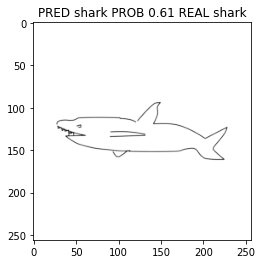

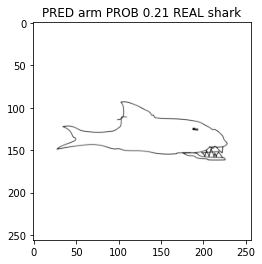

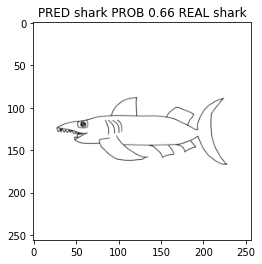

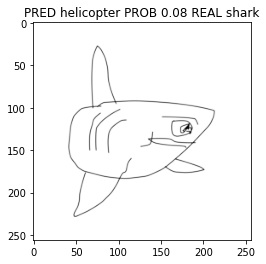

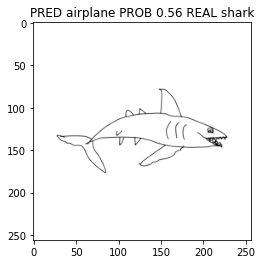

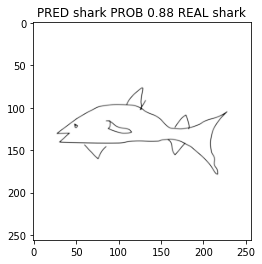

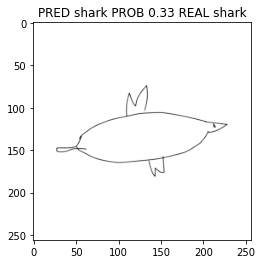

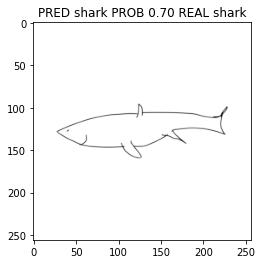

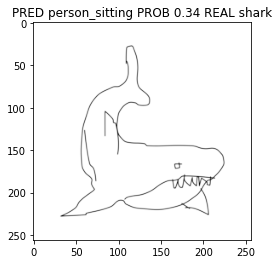

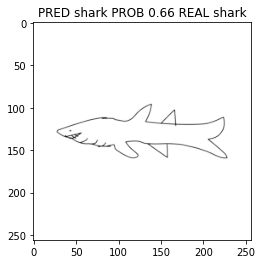

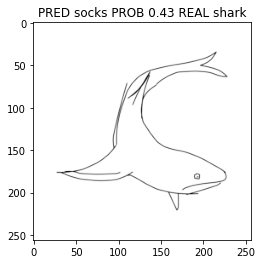

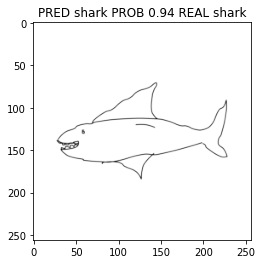

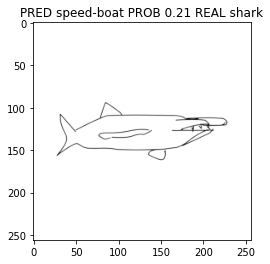

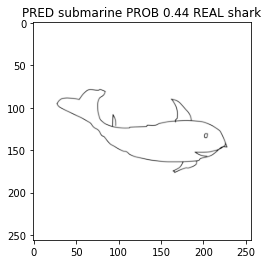

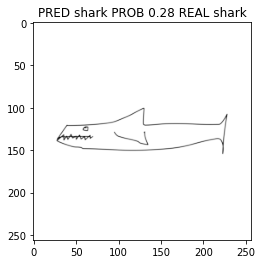

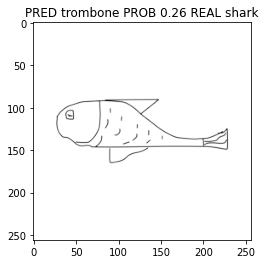

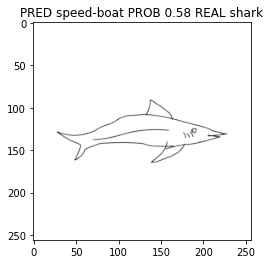

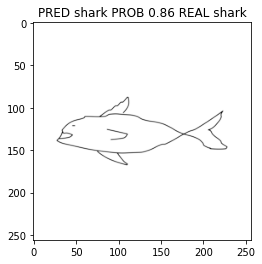

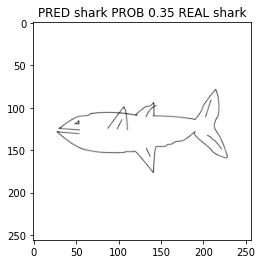

In [33]:
for n in np.where(y_test == np.where(real_labels == 'shark')[0])[0]:
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [34]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if real / predichas < 0.5:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

 16 real  17 pred  40 class 	pen
				cigarette	0.12
-------------
 19 real  15 pred  35 class 	hammer
				sword	0.07
-------------
 41 real  13 pred  49 class 	flower_with_stem
				frog	0.08
-------------
 87 real  10 pred  26 class 	space_shuttle
				shark	0.10
-------------
108 real  17 pred  57 class 	ship
				speed-boat	0.18
-------------
125 real  12 pred  29 class 	boomerang
				telephone	0.00
-------------
143 real  12 pred  25 class 	sword
				pen	0.17
-------------
144 real  12 pred  30 class 	cow
				cat	0.08
-------------
151 real  18 pred  39 class 	syringe
				hammer	0.06
-------------
160 real  15 pred  34 class 	airplane
				submarine	0.07
-------------
176 real  17 pred  37 class 	crab
				frog	0.12
-------------
184 real  15 pred  35 class 	bowl
				tomato	0.07
-------------
209 real  13 pred  35 class 	arm
				cigarette	0.08
-------------
210 real  16 pred  48 class 	mermaid
				leaf	0.06
-------------
224 real   9 pred  30 class 	blimp
				bathtub	0.11
-------------


## VGG

In [35]:
best_model_vgg = keras.models.load_model('./drive/My Drive/dataCC7221/modelVGGBasic12/model.10-1.71.h5')
loss, acc = best_model_vgg.evaluate(X_test, y_test, batch_size=32, )

125/125 [==============================] - 10s 76ms/step - loss: 1.7077 - accuracy: 0.5903


In [36]:
# obtener metricas por clase
y_pred = best_model_vgg.predict(X_test, verbose=1)

125/125 [==============================] - 9s 76ms/step


In [37]:
y_pred_ = np.argmax(layers.Softmax()(y_pred), axis=1)
y_pred_vgg = np.argmax(layers.Softmax()(y_pred), axis=1)
print(y_pred_)
y_pred_scores_ = [l[y_pred_[i]].numpy() for i, l in enumerate(layers.Softmax()(y_pred))]
y_pred_scores_vgg = [l[y_pred_[i]].numpy() for i, l in enumerate(layers.Softmax()(y_pred))]
print(y_pred_scores[:2])

[ 85 190 113 ... 107 198  28]
[0.8034911, 0.9668948]


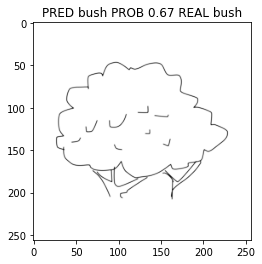

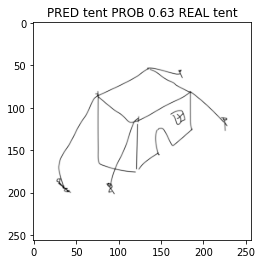

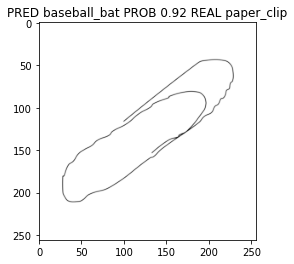

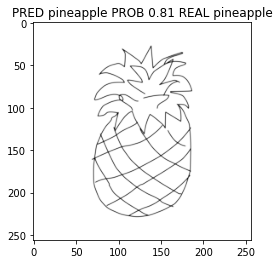

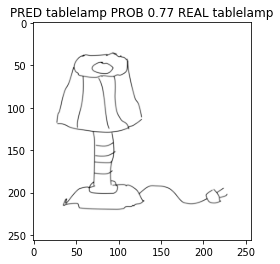

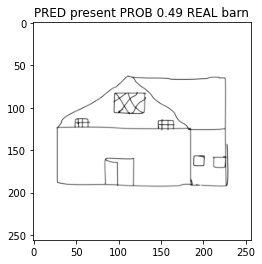

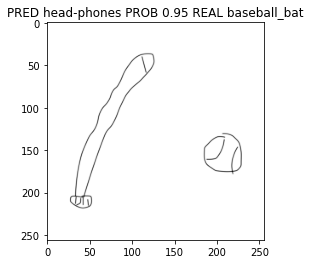

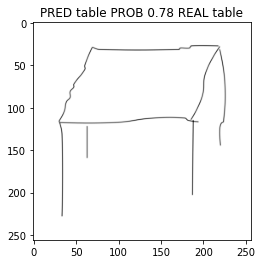

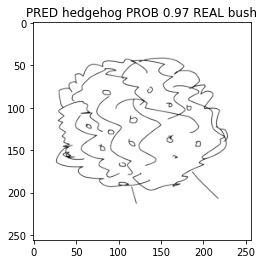

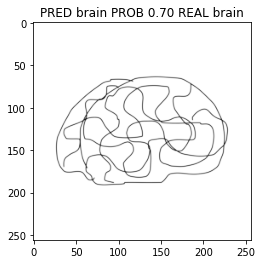

In [38]:
for n in NN:
  # printear real
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [39]:
cohen_kappa = met.cohen_kappa_score(y_test,y_pred_)
balanced_acc = met.balanced_accuracy_score(y_test, y_pred_)

template = '{:.3f}\t cohen kappa\n{:.3f}\t balanced_accuracy\n'
template += ''
print(template.format(cohen_kappa, balanced_acc))

print(met.classification_report(y_test, y_pred_, target_names=real_labels))

0.589	 cohen kappa
0.592	 balanced_accuracy

                  precision    recall  f1-score   support

            head       0.53      0.57      0.55        14
  human-skeleton       0.82      0.75      0.78        12
           chair       0.62      1.00      0.77        10
         pretzel       0.90      0.75      0.82        12
          shovel       0.83      0.68      0.75        22
            leaf       0.71      0.77      0.74        13
       parachute       0.91      0.53      0.67        19
           house       1.00      0.28      0.43        18
       hamburger       0.90      0.60      0.72        15
      chandelier       0.53      0.38      0.44        21
            tire       0.73      0.38      0.50        21
           truck       0.70      0.41      0.52        17
      frying-pan       0.41      1.00      0.58        11
            lion       0.14      0.15      0.15        13
            vase       0.73      0.69      0.71        16
       saxophone       0.3

In [40]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if mas_parecido_count / real > 0.3:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

 10 real  21 pred  11 class 	tire
				wheel	0.38
-------------
 36 real  11 pred   6 class 	van
				suv	0.36
-------------
 47 real  11 pred   7 class 	cigarette
				pen	0.36
-------------
 53 real  13 pred   5 class 	axe
				hammer	0.38
-------------
106 real   9 pred   4 class 	armchair
				chair	0.33
-------------
117 real  12 pred   5 class 	car_sedan
				race_car	0.33
-------------
136 real  21 pred   1 class 	violin
				guitar	0.57
-------------
144 real  12 pred   9 class 	cow
				lion	0.33
-------------


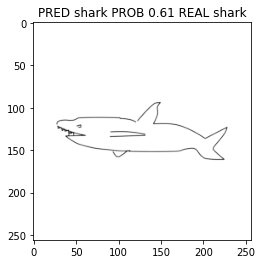

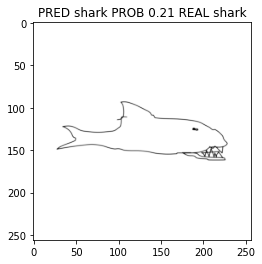

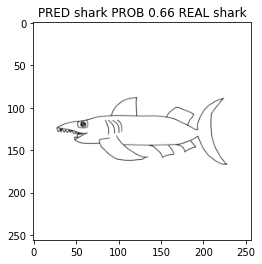

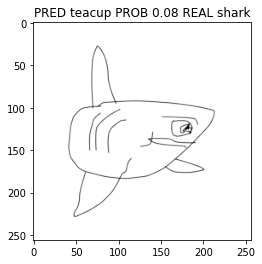

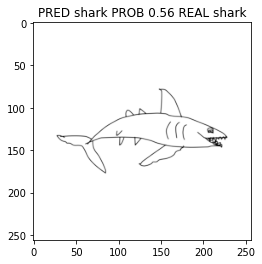

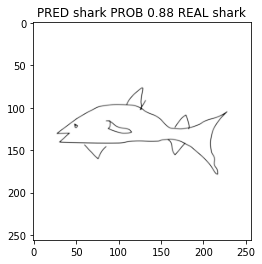

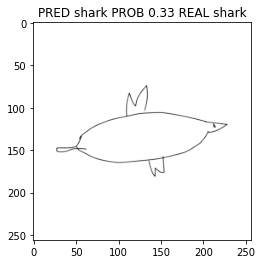

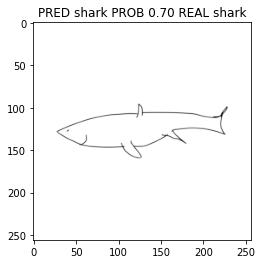

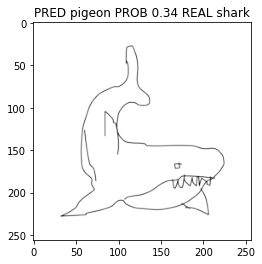

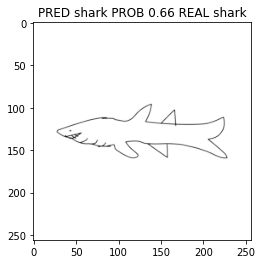

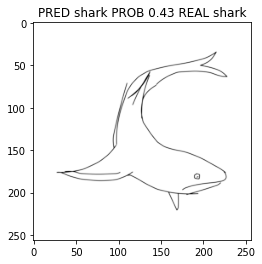

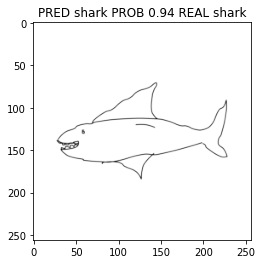

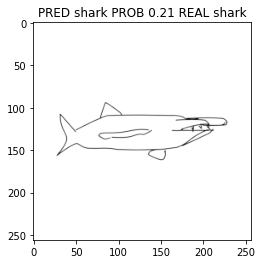

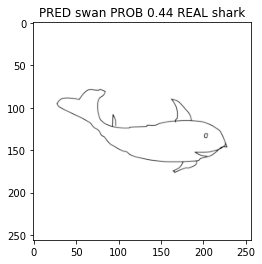

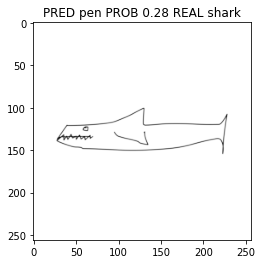

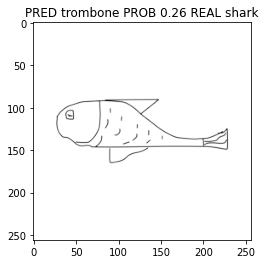

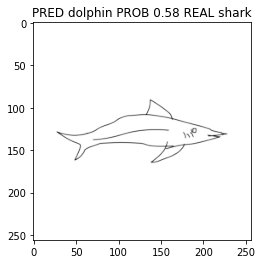

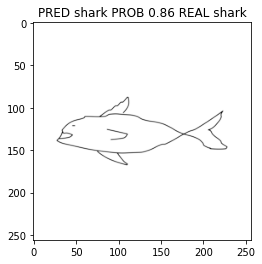

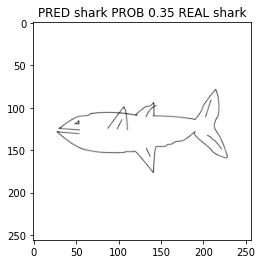

In [41]:
for n in np.where(y_test == np.where(real_labels == 'shark')[0])[0]:
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('PRED {} PROB {:.2f} REAL {}'.format(real_labels[y_pred_[n]],
                                                 y_pred_scores[n],
                                                 real_labels[y_test[n]]))
  plt.show()

In [42]:
# printear metricas por clase
for n in range(0, nb_classes):

  # if n == 20: break
  
  real = np.sum([y_test == n])
  predichas = np.sum([y_pred_ == n])
  
  idx = np.where(y_test == n)[0]
  parecidas = y_pred_[idx]
  parecida_1 = 0

  mas_parecido_count = 0
  for e in np.unique(parecidas):
    if np.sum(parecidas == e) > mas_parecido_count and e != n:
      mas_parecido_count = np.sum(parecidas == e)
      parecido_1 = e

  parecida_2 = 0

  # conteo de las clases reales y de las predichas
  # template = '{:3d} real {:3d} pred {:3d} sim1 {:3d} sim2 {:3d} class \t{}\n\t\t\t\t\t\t{}\t{:.2f}'
  # print(template.format(n, real, predichas,
  #                       parecida_1, parecida_2,
  #                       real_labels[n],
  #                       real_labels[parecido_1], mas_parecido_count / real))
  
  if real / predichas < 0.5:
    template = '{:3d} real {:3d} pred {:3d} class \t{}\n\t\t\t\t{}\t{:.2f}'
    print(template.format(n, real, predichas,
                          real_labels[n],
                          real_labels[parecido_1], mas_parecido_count / real))
    print('-------------')

 12 real  11 pred  27 class 	frying-pan
				van	0.00
-------------
 28 real  14 pred  31 class 	cell_phone
				walkie_talkie	0.07
-------------
 32 real  12 pred  32 class 	telephone
				mushroom	0.17
-------------
 55 real  13 pred  31 class 	wheel
				donut	0.15
-------------
 63 real  16 pred  40 class 	guitar
				frying-pan	0.06
-------------
 77 real   9 pred  21 class 	socks
				moon	0.11
-------------
132 real  19 pred  42 class 	teacup
				beer-mug	0.11
-------------
138 real  18 pred  41 class 	wrist-watch
				head	0.06
-------------
162 real  12 pred  27 class 	sheep
				frog	0.08
-------------
194 real  15 pred  47 class 	trombone
				submarine	0.07
-------------
204 real  16 pred  38 class 	ipod
				cell_phone	0.06
-------------
217 real  20 pred  47 class 	owl
				penguin	0.05
-------------


------------


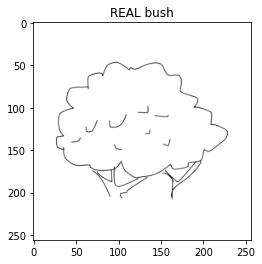

PROB: 0.67	PRED: hedgehog	model: squeeze 
PROB: 0.58	PRED: hedgehog	model: res + drop 
PROB: 0.06	PRED: bush	model: resnet 
PROB: 0.53	PRED: bush	model: vgg 
------------
------------


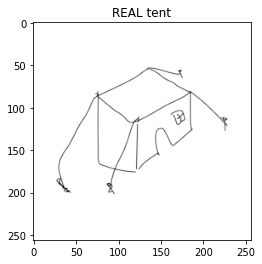

PROB: 0.63	PRED: tent	model: squeeze 
PROB: 0.39	PRED: tent	model: res + drop 
PROB: 0.91	PRED: tent	model: resnet 
PROB: 0.49	PRED: tent	model: vgg 
------------
------------


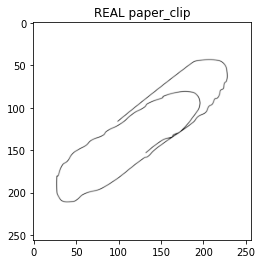

PROB: 0.92	PRED: paper_clip	model: squeeze 
PROB: 0.54	PRED: snowboard	model: res + drop 
PROB: 0.45	PRED: snowboard	model: resnet 
PROB: 0.61	PRED: baseball_bat	model: vgg 
------------
------------


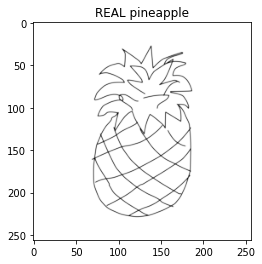

PROB: 0.81	PRED: pineapple	model: squeeze 
PROB: 0.54	PRED: pineapple	model: res + drop 
PROB: 1.00	PRED: pineapple	model: resnet 
PROB: 0.92	PRED: pineapple	model: vgg 
------------
------------


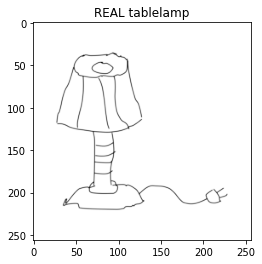

PROB: 0.77	PRED: tablelamp	model: squeeze 
PROB: 0.84	PRED: tablelamp	model: res + drop 
PROB: 0.54	PRED: tablelamp	model: resnet 
PROB: 0.88	PRED: tablelamp	model: vgg 
------------
------------


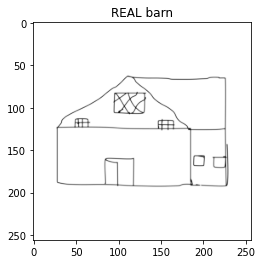

PROB: 0.49	PRED: barn	model: squeeze 
PROB: 0.42	PRED: barn	model: res + drop 
PROB: 0.05	PRED: present	model: resnet 
PROB: 0.68	PRED: present	model: vgg 
------------
------------


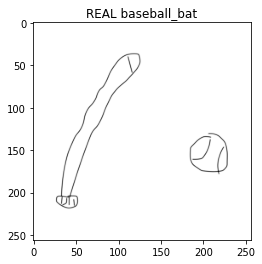

PROB: 0.95	PRED: snake	model: squeeze 
PROB: 0.25	PRED: spoon	model: res + drop 
PROB: 0.00	PRED: key	model: resnet 
PROB: 0.32	PRED: head-phones	model: vgg 
------------
------------


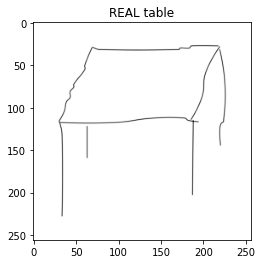

PROB: 0.78	PRED: table	model: squeeze 
PROB: 0.96	PRED: table	model: res + drop 
PROB: 0.98	PRED: table	model: resnet 
PROB: 0.97	PRED: table	model: vgg 
------------
------------


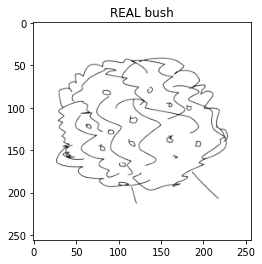

PROB: 0.97	PRED: brain	model: squeeze 
PROB: 0.44	PRED: hedgehog	model: res + drop 
PROB: 0.27	PRED: bush	model: resnet 
PROB: 0.72	PRED: hedgehog	model: vgg 
------------
------------


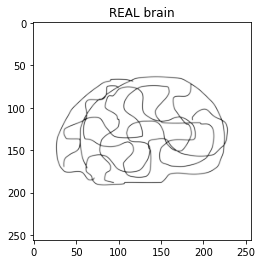

PROB: 0.70	PRED: brain	model: squeeze 
PROB: 0.56	PRED: brain	model: res + drop 
PROB: 0.79	PRED: brain	model: resnet 
PROB: 0.29	PRED: brain	model: vgg 
------------


In [52]:
for n in NN:
  print('------------')
  # printear real
  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('REAL {}'.format(real_labels[y_test[n]]))
  plt.show()

  template = 'PROB: {:.2f}\tPRED: {}\tmodel: {} '
  for pred_, scores, model in [(y_pred_squeeze,  y_pred_scores_squeeze  , 'squeeze'),
                               (y_pred_res_drop, y_pred_scores_res_drop , 'res + drop'),
                               (y_pred_res,      y_pred_scores_res      , 'resnet'),
                               (y_pred_vgg,      y_pred_scores_vgg      , 'vgg')]:
    print(template.format(scores[n], real_labels[pred_[n]],
                          model))

  print('------------')

------------


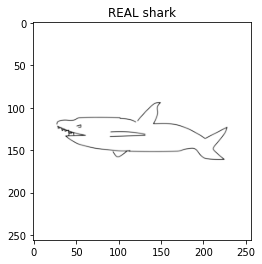

PROB: 0.61	PRED: shark	model: squeeze 
PROB: 0.73	PRED: shark	model: res + drop 
PROB: 0.72	PRED: shark	model: resnet 
PROB: 0.93	PRED: shark	model: vgg 
------------
------------


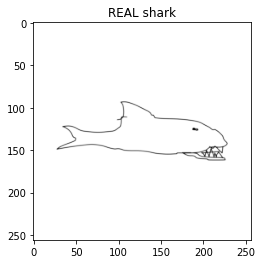

PROB: 0.21	PRED: flying_bird	model: squeeze 
PROB: 0.42	PRED: arm	model: res + drop 
PROB: 0.02	PRED: shark	model: resnet 
PROB: 0.68	PRED: shark	model: vgg 
------------
------------


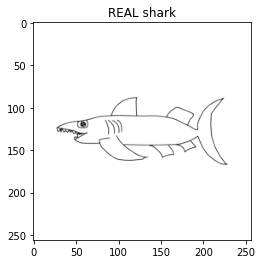

PROB: 0.66	PRED: shark	model: squeeze 
PROB: 0.73	PRED: shark	model: res + drop 
PROB: 0.65	PRED: shark	model: resnet 
PROB: 0.46	PRED: shark	model: vgg 
------------
------------


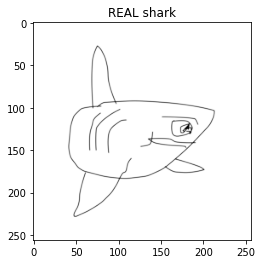

PROB: 0.08	PRED: swan	model: squeeze 
PROB: 0.13	PRED: helicopter	model: res + drop 
PROB: 0.00	PRED: space_shuttle	model: resnet 
PROB: 0.20	PRED: teacup	model: vgg 
------------
------------


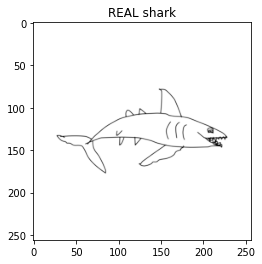

PROB: 0.56	PRED: flying_bird	model: squeeze 
PROB: 0.35	PRED: airplane	model: res + drop 
PROB: 0.06	PRED: shark	model: resnet 
PROB: 0.58	PRED: shark	model: vgg 
------------
------------


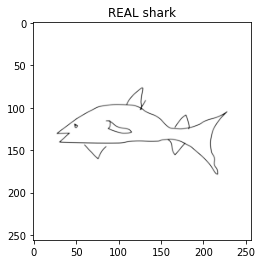

PROB: 0.88	PRED: shark	model: squeeze 
PROB: 0.84	PRED: shark	model: res + drop 
PROB: 0.81	PRED: shark	model: resnet 
PROB: 0.88	PRED: shark	model: vgg 
------------
------------


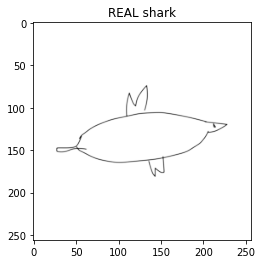

PROB: 0.33	PRED: dolphin	model: squeeze 
PROB: 0.68	PRED: shark	model: res + drop 
PROB: 0.03	PRED: airplane	model: resnet 
PROB: 0.50	PRED: shark	model: vgg 
------------
------------


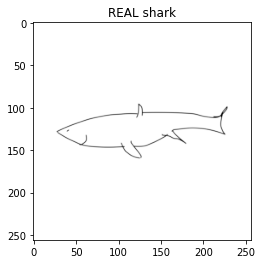

PROB: 0.70	PRED: shark	model: squeeze 
PROB: 0.43	PRED: shark	model: res + drop 
PROB: 0.72	PRED: shark	model: resnet 
PROB: 0.39	PRED: shark	model: vgg 
------------
------------


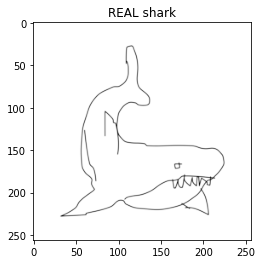

PROB: 0.34	PRED: pigeon	model: squeeze 
PROB: 0.22	PRED: person_sitting	model: res + drop 
PROB: 0.07	PRED: pigeon	model: resnet 
PROB: 0.20	PRED: pigeon	model: vgg 
------------
------------


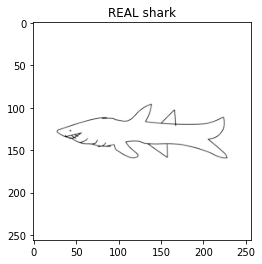

PROB: 0.66	PRED: flying_bird	model: squeeze 
PROB: 0.75	PRED: shark	model: res + drop 
PROB: 0.13	PRED: flying_bird	model: resnet 
PROB: 0.55	PRED: shark	model: vgg 
------------
------------


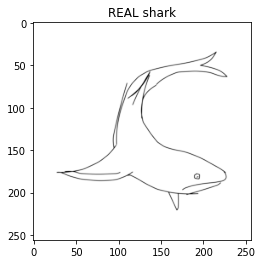

PROB: 0.43	PRED: flying_bird	model: squeeze 
PROB: 0.15	PRED: socks	model: res + drop 
PROB: 0.00	PRED: tablelamp	model: resnet 
PROB: 0.22	PRED: shark	model: vgg 
------------
------------


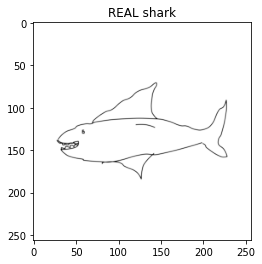

PROB: 0.94	PRED: shark	model: squeeze 
PROB: 0.96	PRED: shark	model: res + drop 
PROB: 0.92	PRED: shark	model: resnet 
PROB: 0.84	PRED: shark	model: vgg 
------------
------------


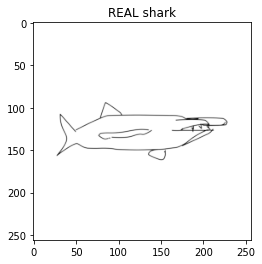

PROB: 0.21	PRED: airplane	model: squeeze 
PROB: 0.41	PRED: speed-boat	model: res + drop 
PROB: 0.52	PRED: speed-boat	model: resnet 
PROB: 0.75	PRED: shark	model: vgg 
------------
------------


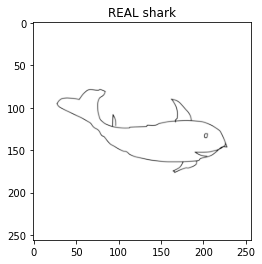

PROB: 0.44	PRED: flying_bird	model: squeeze 
PROB: 0.29	PRED: submarine	model: res + drop 
PROB: 0.27	PRED: cloud	model: resnet 
PROB: 0.23	PRED: swan	model: vgg 
------------
------------


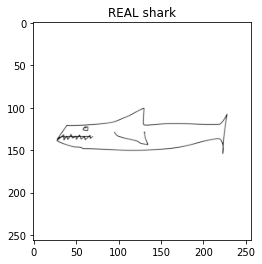

PROB: 0.28	PRED: submarine	model: squeeze 
PROB: 0.26	PRED: shark	model: res + drop 
PROB: 0.75	PRED: shark	model: resnet 
PROB: 0.38	PRED: pen	model: vgg 
------------
------------


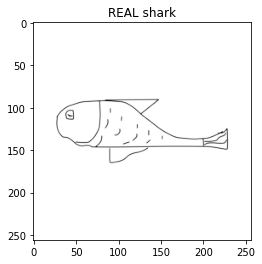

PROB: 0.26	PRED: satellite	model: squeeze 
PROB: 0.31	PRED: trombone	model: res + drop 
PROB: 0.02	PRED: blimp	model: resnet 
PROB: 0.93	PRED: trombone	model: vgg 
------------
------------


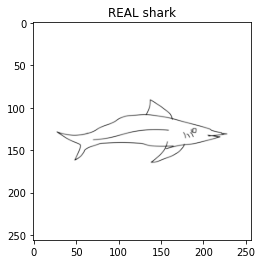

PROB: 0.58	PRED: flying_bird	model: squeeze 
PROB: 0.36	PRED: speed-boat	model: res + drop 
PROB: 0.15	PRED: hand	model: resnet 
PROB: 0.48	PRED: dolphin	model: vgg 
------------
------------


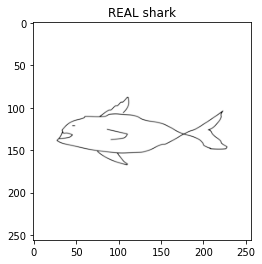

PROB: 0.86	PRED: shark	model: squeeze 
PROB: 0.95	PRED: shark	model: res + drop 
PROB: 0.82	PRED: shark	model: resnet 
PROB: 0.97	PRED: shark	model: vgg 
------------
------------


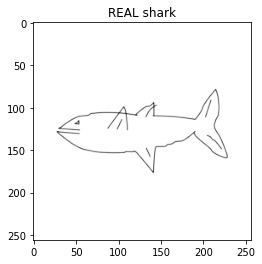

PROB: 0.35	PRED: shark	model: squeeze 
PROB: 0.74	PRED: shark	model: res + drop 
PROB: 0.55	PRED: shark	model: resnet 
PROB: 0.64	PRED: shark	model: vgg 
------------


In [56]:
for n in np.where(y_test == np.where(real_labels == 'shark')[0])[0]:
  print('------------')

  plt.imshow(X_test[n].reshape((img_size,img_size)), cmap='Greys_r')
  plt.title('REAL {}'.format(real_labels[y_test[n]]))
  plt.show()

  template = 'PROB: {:.2f}\tPRED: {:3s}\tmodel: {} '
  for pred_, scores, model in [(y_pred_squeeze,  y_pred_scores_squeeze  , 'squeeze'),
                               (y_pred_res_drop, y_pred_scores_res_drop , 'res + drop'),
                               (y_pred_res,      y_pred_scores_res      , 'resnet'),
                               (y_pred_vgg,      y_pred_scores_vgg      , 'vgg')]:
    
    print(template.format(scores[n], real_labels[pred_[n]],
                          model))

  print('------------')